In [160]:
import pandas as pd
import folium
import mplleaflet

## Estaciones

Dataset and metadata in: <https://opendata-ajuntament.barcelona.cat/data/es/dataset/qualitat-aire-estacions-bcn>

Contaminants <https://opendata-ajuntament.barcelona.cat/data/ca/dataset/contaminants-estacions-mesura-qualitat-aire>

In [161]:
# Read data from file
estaciones = pd.read_csv('raw_csv/Qualitat_Aire_Estacions.csv')

print('There are ' + str(estaciones.shape[0]) + ' estactiones and each estation has ' + str(estaciones.shape[1]) + ' parameters.')
# Preview the first 5 lines 
estaciones.head()

There are 39 estactiones and each estation has 15 parameters.


,Estacio,nom_cabina,codi_dtes,zqa,codi_eoi,Longitud,Latitud,ubicacio,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Clas_1,Clas_2,Codi_Contaminant
0,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,8
1,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,14
2,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,7
3,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,12
4,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,8


In [162]:
# information of the dataset
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estacio           39 non-null     int64  
 1   nom_cabina        39 non-null     object 
 2   codi_dtes         39 non-null     object 
 3   zqa               39 non-null     int64  
 4   codi_eoi          39 non-null     int64  
 5   Longitud          39 non-null     float64
 6   Latitud           39 non-null     float64
 7   ubicacio          39 non-null     object 
 8   Codi_districte    39 non-null     int64  
 9   Nom_districte     39 non-null     object 
 10  Codi_barri        39 non-null     int64  
 11  Nom_barri         39 non-null     object 
 12  Clas_1            39 non-null     object 
 13  Clas_2            39 non-null     object 
 14  Codi_Contaminant  39 non-null     int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 4.7+ KB


In [163]:
estaciones.describe()     # descriptive statistics

,Estacio,zqa,codi_eoi,Longitud,Latitud,Codi_districte,Codi_barri,Codi_Contaminant
count,39.000000,39.0,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000
mean,44.307692,1.0,8.019044e+06,2.152795,41.396944,5.307692,27.076923,8.641026
std,14.905234,0.0,1.490523e+01,0.026539,0.015535,2.374800,18.557712,3.681298
min,4.000000,1.0,8.019004e+06,2.115100,41.378800,1.000000,4.000000,1.000000
25%,43.000000,1.0,8.019043e+06,2.140550,41.385850,4.000000,9.000000,7.000000
50%,44.000000,1.0,8.019044e+06,2.153400,41.387500,5.000000,21.000000,8.000000
75%,54.000000,1.0,8.019054e+06,2.153800,41.403900,7.000000,41.000000,12.000000
max,57.000000,1.0,8.019057e+06,2.204500,41.426100,10.000000,68.000000,14.000000


In [164]:
# Mira si hay estaciones con valores erróneos
estaciones.plot.scatter('Longitud', 'Latitud', figsize=(8, 8))
# Estaciones, con mapa de fondo
mplleaflet.display()

In [165]:
# Show the measurement stations in a map

# Center the map
centro_lat, centro_lon = 41.396944, 2.152795

# Generate the map
folium_map = folium.Map(location=[centro_lat, centro_lon], zoom_start=12, tiles='cartodb positron')

# Populate the map 
for i, row in estaciones.iterrows():
    # generate the popup message that is shown on click (name, latitude and longitude)
    popup_text = f"<b> Nombre: </b> {row.ubicacio} <br> <b> Latitud: </b> {row.Latitud:.5f} <br> <b> Longitud: </b> {row.Longitud:.5f} <br>"
    # Aggregate markers
    folium.CircleMarker(location=[row.Latitud, row.Longitud], radius=5, tooltip=popup_text, fill=True, fill_opacity=0.4).add_to(folium_map)

# Save the map into a file
folium_map.save('data_html/estaciones_todas.html')

# Show/render the map
folium_map

## Datos

Dataset and metadata in: <https://opendata-ajuntament.barcelona.cat/data/es/dataset/qualitat-aire-detall-bcn>

In [166]:
data = pd.read_csv('raw_csv/2020_03_Marc_qualitat_aire_BCN.csv')

print('There are ' + str(data.shape[0]) + ' records and each record has ' + str(data.shape[1]) + ' parameters.')
# Preview the first 5 lines
data.head() 

There are 1395 records and each record has 57 parameters.


,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,4,7,2020,3,1,18.0,...,5.0,V,7.0,V,4.0,V,3.0,V,NaN,N
1,8,Barcelona,19,Barcelona,4,7,2020,3,2,4.0,...,2.0,V,2.0,V,1.0,V,1.0,V,NaN,N
2,8,Barcelona,19,Barcelona,4,7,2020,3,3,1.0,...,3.0,V,2.0,V,3.0,V,2.0,V,NaN,N
3,8,Barcelona,19,Barcelona,4,7,2020,3,4,1.0,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
4,8,Barcelona,19,Barcelona,4,7,2020,3,5,NaN,...,3.0,V,2.0,V,1.0,V,1.0,V,NaN,N


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CODI_PROVINCIA    1395 non-null   int64  
 1   PROVINCIA         1395 non-null   object 
 2   CODI_MUNICIPI     1395 non-null   int64  
 3   MUNICIPI          1395 non-null   object 
 4   ESTACIO           1395 non-null   int64  
 5   CODI_CONTAMINANT  1395 non-null   int64  
 6   ANY               1395 non-null   int64  
 7   MES               1395 non-null   int64  
 8   DIA               1395 non-null   int64  
 9   H01               1382 non-null   float64
 10  V01               1395 non-null   object 
 11  H02               1339 non-null   float64
 12  V02               1395 non-null   object 
 13  H03               1385 non-null   float64
 14  V03               1395 non-null   object 
 15  H04               1385 non-null   float64
 16  V04               1395 non-null   object 


In [168]:
print('Unique provincias: ' + str(data.PROVINCIA.nunique()))
print('Unique municipio: ' + str(data.MUNICIPI.nunique()))
print('Unique estations: ' + str(data.ESTACIO.nunique()))
print('Unique contaminants: ' + str(data.CODI_CONTAMINANT.nunique()))
print('Unique years: ' + str(data.ANY.nunique()))
print('Unique months: ' + str(data.MES.nunique()))
print('Unique days: ' + str(data.DIA.nunique()))

Unique provincias: 1
Unique municipio: 1
Unique estations: 8
Unique contaminants: 8
Unique years: 1
Unique months: 1
Unique days: 31


In [169]:
my_head = data.head(77)
my_head

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,4,7,2020,3,1,18.0,...,5.0,V,7.0,V,4.0,V,3.0,V,NaN,N
1,8,Barcelona,19,Barcelona,4,7,2020,3,2,4.0,...,2.0,V,2.0,V,1.0,V,1.0,V,NaN,N
2,8,Barcelona,19,Barcelona,4,7,2020,3,3,1.0,...,3.0,V,2.0,V,3.0,V,2.0,V,NaN,N
3,8,Barcelona,19,Barcelona,4,7,2020,3,4,1.0,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
4,8,Barcelona,19,Barcelona,4,7,2020,3,5,NaN,...,3.0,V,2.0,V,1.0,V,1.0,V,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,8,Barcelona,19,Barcelona,4,10,2020,3,11,33.0,...,28.0,V,33.0,V,33.0,V,35.0,V,NaN,N
73,8,Barcelona,19,Barcelona,4,10,2020,3,12,37.0,...,18.0,V,14.0,V,10.0,V,9.0,V,NaN,N
74,8,Barcelona,19,Barcelona,4,10,2020,3,13,14.0,...,36.0,V,31.0,V,24.0,V,22.0,V,NaN,N
75,8,Barcelona,19,Barcelona,4,10,2020,3,14,27.0,...,15.0,V,17.0,V,21.0,V,27.0,V,NaN,N


In [170]:
# https://stackoverflow.com/questions/28654047/pandas-convert-some-columns-into-rows
#CODI_PROVINCIA	PROVINCIA	CODI_MUNICIPI	MUNICIPI	ESTACIO	CODI_CONTAMINANT	ANY	MES	DIA	H01	...	H20	V20	H21	V21	H22	V22	H23	V23	H24	V24
id_vars = ['CODI_PROVINCIA', 'PROVINCIA', 'CODI_MUNICIPI', 'MUNICIPI', 'ESTACIO', 'CODI_CONTAMINANT', 'ANY', 'MES', 'DIA']
value_vars = ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
my_transform = data
my_transform = my_transform.melt(id_vars = id_vars, value_vars = value_vars, var_name='HORA_TEXT', value_name='VALOR')
my_transform

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,HORA_TEXT,VALOR
0,8,Barcelona,19,Barcelona,4,7,2020,3,1,H01,18.0
1,8,Barcelona,19,Barcelona,4,7,2020,3,2,H01,4.0
2,8,Barcelona,19,Barcelona,4,7,2020,3,3,H01,1.0
3,8,Barcelona,19,Barcelona,4,7,2020,3,4,H01,1.0
4,8,Barcelona,19,Barcelona,4,7,2020,3,5,H01,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33475,8,Barcelona,19,Barcelona,58,14,2020,3,27,H24,85.0
33476,8,Barcelona,19,Barcelona,58,14,2020,3,28,H24,NaN
33477,8,Barcelona,19,Barcelona,58,14,2020,3,29,H24,73.0
33478,8,Barcelona,19,Barcelona,58,14,2020,3,30,H24,NaN


In [171]:
# improve by not loosing the Vxx column
# test the same by dropping columns


In [172]:
my_transform.info()
def hora_text_to_hora_digit(h):
    if 'H01' in h:
        return '01'
    elif 'H02' in h:
        return '02'
    elif 'H03' in h:
        return '03'
    elif 'H04' in h:
        return '04'
    elif 'H05' in h:
        return '05'
    elif 'H06' in h:
        return '06'
    elif 'H07' in h:
        return '07'
    elif 'H08' in h:
        return '08'
    elif 'H09' in h:
        return '09'
    elif 'H10' in h:
        return '10'
    elif 'H11' in h:
        return '11'
    elif 'H12' in h:
        return '12'
    elif 'H13' in h:
        return '13'
    elif 'H14' in h:
        return '14'
    elif 'H15' in h:
        return '15'
    elif 'H16' in h:
        return '16'
    elif 'H17' in h:
        return '17'
    elif 'H18' in h:
        return '18'
    elif 'H19' in h:
        return '19'
    elif 'H20' in h:
        return '20'
    elif 'H21' in h:
        return '21'
    elif 'H22' in h:
        return '22'
    elif 'H23' in h:
        return '23'
    elif 'H24' in h:
        return '24'

def remove_first_character(s):
    s = s[1:]

#my_transform['HORA_DIGIT'] = my_transform['HORA_TEXT'].apply(remove_first_character)
my_transform['HORA_DIGIT'] = my_transform['HORA_TEXT'].apply(hora_text_to_hora_digit)
print(my_transform)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33480 entries, 0 to 33479
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CODI_PROVINCIA    33480 non-null  int64  
 1   PROVINCIA         33480 non-null  object 
 2   CODI_MUNICIPI     33480 non-null  int64  
 3   MUNICIPI          33480 non-null  object 
 4   ESTACIO           33480 non-null  int64  
 5   CODI_CONTAMINANT  33480 non-null  int64  
 6   ANY               33480 non-null  int64  
 7   MES               33480 non-null  int64  
 8   DIA               33480 non-null  int64  
 9   HORA_TEXT         33480 non-null  object 
 10  VALOR             31979 non-null  float64
dtypes: float64(1), int64(7), object(3)
memory usage: 2.8+ MB
       CODI_PROVINCIA  PROVINCIA  CODI_MUNICIPI   MUNICIPI  ESTACIO  \
0                   8  Barcelona             19  Barcelona        4   
1                   8  Barcelona             19  Barcelona        4   
2    

In [173]:
#my_transform.info()
my_transform['FECHA_LARGA'] = my_transform.ANY.astype(str) + '-' + my_transform.MES.astype(str) + '-' + my_transform.DIA.astype(str)
my_transform['HORA_LARGA'] = my_transform.HORA_DIGIT + ':00:00'
#my_transform['FECHA_HORA'] = my_transform.FECHA_LARGA + ' ' + my_transform.HORA_LARGA
#my_transform['FECHA_HORA'] = pd.to_datetime(my_transform['FECHA_HORA'])
#my_transform['FECHA_HORA'] = pd.to_datetime(my_transform['FECHA_LARGA'], format='%Y-%m-%d %H:%M:%S')
#my_transform['FECHA_HORA'] = pd.to_datetime(my_transform['FECHA_LARGA'], infer_datetime_format=True)
my_transform['FECHA_HORA'] = pd.to_datetime(my_transform['FECHA_LARGA'], format='%Y-%m-%d') + pd.to_timedelta(my_transform['HORA_LARGA'])
my_transform
#my_transform.info()


,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,HORA_TEXT,VALOR,HORA_DIGIT,FECHA_LARGA,HORA_LARGA,FECHA_HORA
0,8,Barcelona,19,Barcelona,4,7,2020,3,1,H01,18.0,01,2020-3-1,01:00:00,2020-03-01 01:00:00
1,8,Barcelona,19,Barcelona,4,7,2020,3,2,H01,4.0,01,2020-3-2,01:00:00,2020-03-02 01:00:00
2,8,Barcelona,19,Barcelona,4,7,2020,3,3,H01,1.0,01,2020-3-3,01:00:00,2020-03-03 01:00:00
3,8,Barcelona,19,Barcelona,4,7,2020,3,4,H01,1.0,01,2020-3-4,01:00:00,2020-03-04 01:00:00
4,8,Barcelona,19,Barcelona,4,7,2020,3,5,H01,NaN,01,2020-3-5,01:00:00,2020-03-05 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33475,8,Barcelona,19,Barcelona,58,14,2020,3,27,H24,85.0,24,2020-3-27,24:00:00,2020-03-28 00:00:00
33476,8,Barcelona,19,Barcelona,58,14,2020,3,28,H24,NaN,24,2020-3-28,24:00:00,2020-03-29 00:00:00
33477,8,Barcelona,19,Barcelona,58,14,2020,3,29,H24,73.0,24,2020-3-29,24:00:00,2020-03-30 00:00:00
33478,8,Barcelona,19,Barcelona,58,14,2020,3,30,H24,NaN,24,2020-3-30,24:00:00,2020-03-31 00:00:00


Text(0, 0.5, 'SO2')

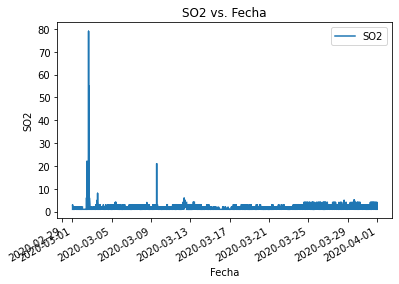

In [176]:
#CODI_CONTAMINANT
# 1 SO2
aux = my_transform[my_transform.CODI_CONTAMINANT==1]
aux.sort_values('FECHA_HORA', inplace=True)

#aux.plot('FECHA_HORA', 'VALOR', legend=False)
aux.plot('FECHA_HORA', 'VALOR', legend=True, label='SO2')
plt.title('SO2 vs. Fecha');
plt.xlabel('Fecha')
plt.ylabel('SO2')

Text(0, 0.5, 'CO')

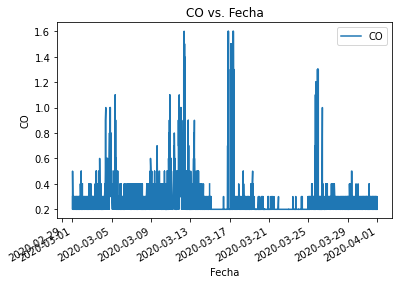

In [182]:
#CODI_CONTAMINANT
# 6 CO
aux = my_transform[my_transform.CODI_CONTAMINANT==6]
aux.sort_values('FECHA_HORA', inplace=True)

#aux.plot('FECHA_HORA', 'VALOR', legend=False)
aux.plot('FECHA_HORA', 'VALOR', legend=True, label='CO')
plt.title('CO vs. Fecha');
plt.xlabel('Fecha')
plt.ylabel('CO')

Text(0, 0.5, 'NO')

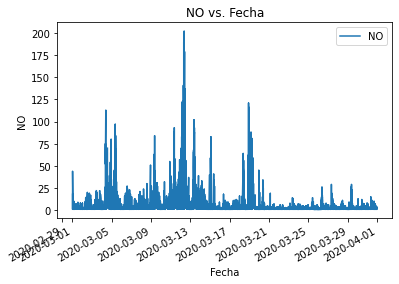

In [180]:
#CODI_CONTAMINANT
# 7 NO
aux = my_transform[my_transform.CODI_CONTAMINANT==7]
aux.sort_values('FECHA_HORA', inplace=True)

#aux.plot('FECHA_HORA', 'VALOR', legend=False)
aux.plot('FECHA_HORA', 'VALOR', legend=True, label='NO')
plt.title('NO vs. Fecha');
plt.xlabel('Fecha')
plt.ylabel('NO')

Text(0, 0.5, 'NO2')

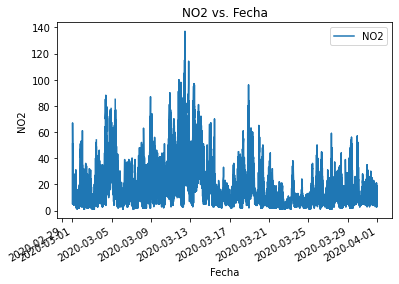

In [181]:
#CODI_CONTAMINANT
# 8 NO2
aux = my_transform[my_transform.CODI_CONTAMINANT==8]
aux.sort_values('FECHA_HORA', inplace=True)

#aux.plot('FECHA_HORA', 'VALOR', legend=False)
aux.plot('FECHA_HORA', 'VALOR', legend=True, label='NO2')
import matplotlib.pyplot as plt
plt.title('NO2 vs. Fecha');
plt.xlabel('Fecha')
plt.ylabel('NO2')

Text(0, 0.5, 'PM10')

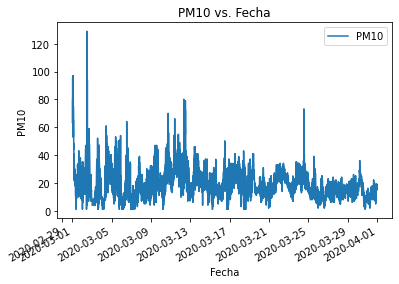

In [178]:
#CODI_CONTAMINANT
# 10 PM10
aux = my_transform[my_transform.CODI_CONTAMINANT==10]
aux.sort_values('FECHA_HORA', inplace=True)

#aux.plot('FECHA_HORA', 'VALOR', legend=False)
aux.plot('FECHA_HORA', 'VALOR', legend=True, label='PM10')
plt.title('PM10 vs. Fecha');
plt.xlabel('Fecha')
plt.ylabel('PM10')

Text(0, 0.5, 'NOx')

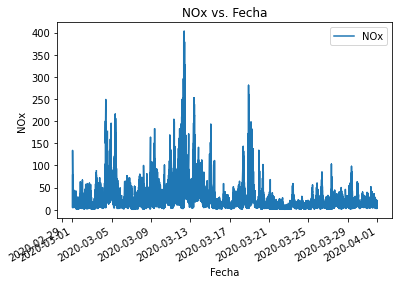

In [183]:
#CODI_CONTAMINANT
# 12 NOx
aux = my_transform[my_transform.CODI_CONTAMINANT==12]
aux.sort_values('FECHA_HORA', inplace=True)

aux.plot('FECHA_HORA', 'VALOR', legend=True, label='NOx')
plt.title('NOx vs. Fecha');
plt.xlabel('Fecha')
plt.ylabel('NOx')

<built-in function min>


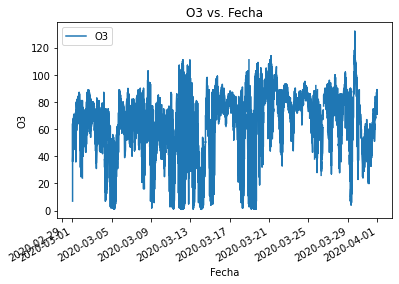

In [187]:
#CODI_CONTAMINANT
# 14 O3
aux = my_transform[my_transform.CODI_CONTAMINANT==14]
aux.sort_values('FECHA_HORA', inplace=True)

aux.plot('FECHA_HORA', 'VALOR', legend=True, label='O3')
plt.title('O3 vs. Fecha');
plt.xlabel('Fecha')
plt.ylabel('O3')

In [192]:
# https://www.geeksforgeeks.org/select-row-with-maximum-and-minimum-value-in-pandas-dataframe/
menor = aux[aux.VALOR == aux.VALOR.min()]
#print(menor)
mayor = aux[aux.VALOR == aux.VALOR.max()]
print(mayor)

CODI_PROVINCIA  PROVINCIA  CODI_MUNICIPI   MUNICIPI  ESTACIO  \
23123               8  Barcelona             19  Barcelona       50   

       CODI_CONTAMINANT   ANY  MES  DIA HORA_TEXT  VALOR HORA_DIGIT  \
23123                14  2020    3   29       H17  132.0         17   

      FECHA_LARGA HORA_LARGA          FECHA_HORA  
23123   2020-3-29   17:00:00 2020-03-29 17:00:00  
